In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import random

In [19]:
# class KMeans:
#     def __init__(self,max_iter=1000,n_clusters=2):
#         self.clusters = n_clusters
#         self.max_iter = max_iter 
#         self.centroids = None 
#         self.labels = None


#     def fit_predict(self,x_train):
        
#         random_index = random.sample(range(0,x_train.shape[0]),self.clusters)
#         self.centroids = x_train[random_index]

#         for _ in range(self.max_iter):
#             #assign clusters
#             cluster_group = self.assign_cluster(x_train)
#             old_centroids = self.centroids 

#             #move centroids 
#             self.centroids = self.move_centroids(x_train,cluster_group)
#             #checking conditions
#             # if (old_centroids == self.centroids).all():
#             if np.allclose(old_centroids, self.centroids):
#                 break
#         self.labels = cluster_group
#         return cluster_group
    
#     def assign_cluster(self,x):
#         cluster_group = []
#         dist = []

#         for row in range(x.shape[0]):
#             for center in self.centroids:
#                 dist.append(np.sqrt(np.dot(row-center,row-center)))
#             min_value = min(dist)
#             idx = dist.index(min_value)
#             cluster_group.append(idx)
#             dist.clear()
        
#         return np.array(cluster_group)
    
#     def move_centroids(self,x_train,cluster_group):
#         cluster_values = np.unique(cluster_group)
#         new_centroids = []
#         for value in cluster_values:
#             new_centroids.append(x_train[cluster_group == value].mean(axis=0))

#         return np.array(new_centroids)
    
#     def cluster_centers_(self):
#         return self.centroids
#     def labels_(self):
#         return self.labels 

In [28]:
class KMeans:
    def __init__(self, max_iter=1000, n_clusters=2):
        self.clusters = n_clusters
        self.max_iter = max_iter 
        self.centroids = None 
        self.labels = None

    def fit_predict(self, x_train):
        random_index = random.sample(range(0, x_train.shape[0]), self.clusters)
        self.centroids = x_train[random_index]

        for _ in range(self.max_iter):
            # Assign clusters
            cluster_group = self.assign_cluster(x_train)
            old_centroids = self.centroids 

            # Move centroids
            self.centroids = self.move_centroids(x_train, cluster_group)

            # Checking for convergence
            if np.allclose(old_centroids, self.centroids):
                break

        self.labels = cluster_group  # Keep original labels without using np.unique()
        return cluster_group

    def assign_cluster(self, x):
        cluster_group = []
        for row in x:
            # Calculate distance from each centroid
            distances = [np.sqrt(np.sum((row - center)**2)) for center in self.centroids]
            # Assign to the closest centroid
            cluster_group.append(np.argmin(distances))
        
        return np.array(cluster_group)
    

    def move_centroids(self, x_train, cluster_group):
        new_centroids = []
        for cluster in range(self.clusters):
            new_centroids.append(x_train[cluster_group == cluster].mean(axis=0))
        
        return np.array(new_centroids)
    


    def cluster_centers_(self):
        return self.centroids

    def labels_(self):
        return self.labels


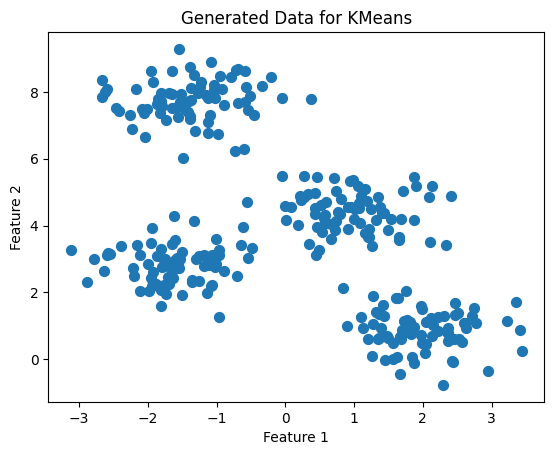

In [11]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data for KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [27]:
kmeans = KMeans(n_clusters=4, max_iter=100)
clusters = kmeans.fit_predict(X)

print("Centroids:", kmeans.cluster_centers_())
print("Labels:", kmeans.labels_())

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

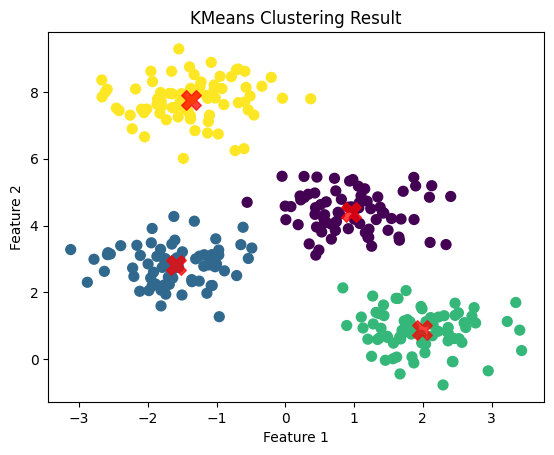

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')

# Plot the centroids
centroids = kmeans.cluster_centers_()
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

# Add labels and title
plt.title("KMeans Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()